# **Dam Deformation Clustering: Use Case of Clustering Unsupervised Machine Learning (K-Means-Hierachical Clustering) in Dam Safety Monitoring** <br>


This research was inspired from this [paper](https://www.sciencedirect.com/science/article/pii/S1674237024000760), “A missing data processing method for dam deformation monitoring data using spatiotemporal clustering and support vector machine model”. The difference between the paper is the dam types, where i used earthfill dam, Tamblang Dam, Indonesia. <br>
<br>
**Abstract**<br>
Unsupervised machine learning using K-Means and hierarchical clustering is used to cluster the movement of surface monuments (in Indonesian called *'Patok Geser'*). The baseline data of this study is time-to-time coordinates taken from inauguration to September 2024. It was found that there are at least 7 clusters that can describe the grouping of the sliding stakes that have similar movement characteristics. 3D visualization was also done to see the condition of Tamblang Dam, and some deflections were seen on the crest of the dam body.  This approach is expected to spark enthusiasm in understanding dam safety in a simple way using the help of machine learning and 3D visualization.
<br>
**Keywords**: Dam, Deformation, Machine Learning, Clustering

<a href="https://www.linkedin.com/in/iqbalfauzanh/"><img src="https://img.shields.io/badge/-© 2025 Iqbal Fauzan Herlambang-417DAC?style=for-the-badge&logoColor=white"/></a>

# Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/00 Belajar Machine Learning/06 Deformation Clustering /Tamblang Surface Deformation - Updated.csv')
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df['group'] = df["surface_monument"].str[:3]
df

,time_stamp,x,y,z,surface_monument,group
0,2023-01-31,299498.292,9100967.580,185.040,CSC 1,CSC
1,2023-02-01,NaN,NaN,NaN,CSC 1,CSC
2,2023-02-02,NaN,NaN,NaN,CSC 1,CSC
3,2023-02-03,NaN,NaN,NaN,CSC 1,CSC
4,2023-02-04,NaN,NaN,NaN,CSC 1,CSC
...,...,...,...,...,...,...
4513,2024-08-04,299691.943,9100900.844,180.332,SSU 7,SSU
4514,2024-08-11,299691.937,9100900.822,180.310,SSU 7,SSU
4515,2024-08-18,299691.937,9100900.822,180.310,SSU 7,SSU
4516,2024-08-25,299691.953,9100900.889,180.324,SSU 7,SSU


In [ ]:
rwl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/00 Belajar Machine Learning/06 Deformation Clustering /Reservoir Water Level Tamblang Sep 24.csv')
rwl['date'] = pd.to_datetime(rwl['date'])
rwl = rwl.dropna()

# Data Cleaning

In [ ]:
# Detect non numeric values
df['x'] = pd.to_numeric(df['x'], errors='coerce')
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df['z'] = pd.to_numeric(df['z'], errors='coerce')
df = df.dropna()

Text(0.5, 1.0, 'X Y Plane')

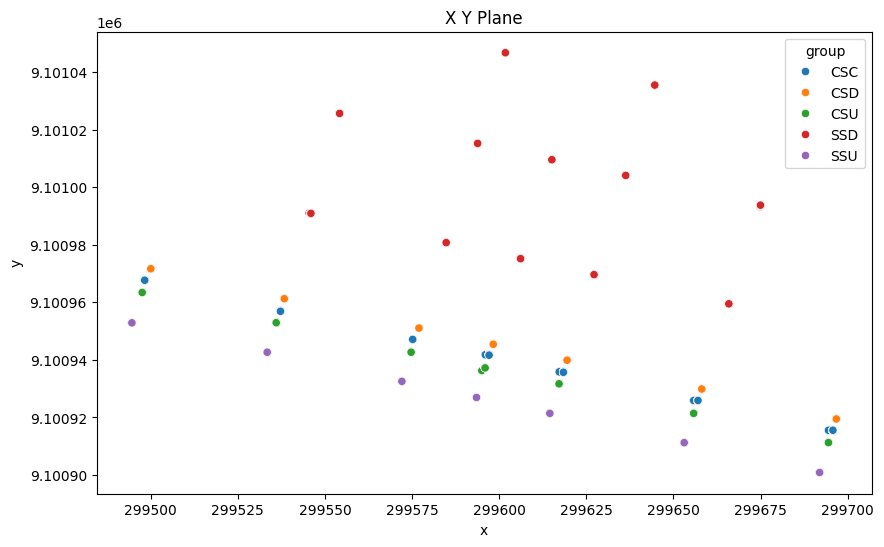

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=df,hue='group',legend=True)
plt.title("X Y Plane")

Text(0.5, 1.0, 'X Z Plane')

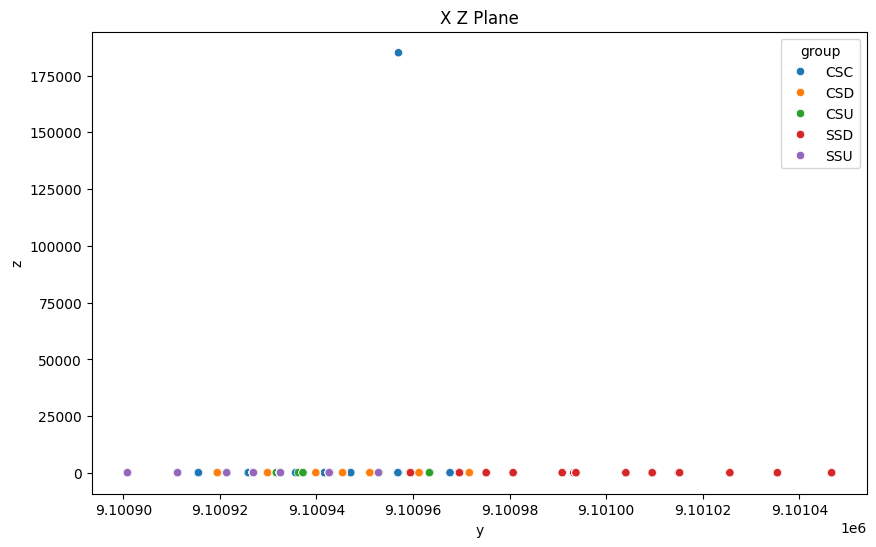

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='y', y='z', data=df,hue='group',legend=True)
plt.title("X Z Plane")

Anomaly in Z axis

Text(0.5, 1.0, 'Y Z Plane')

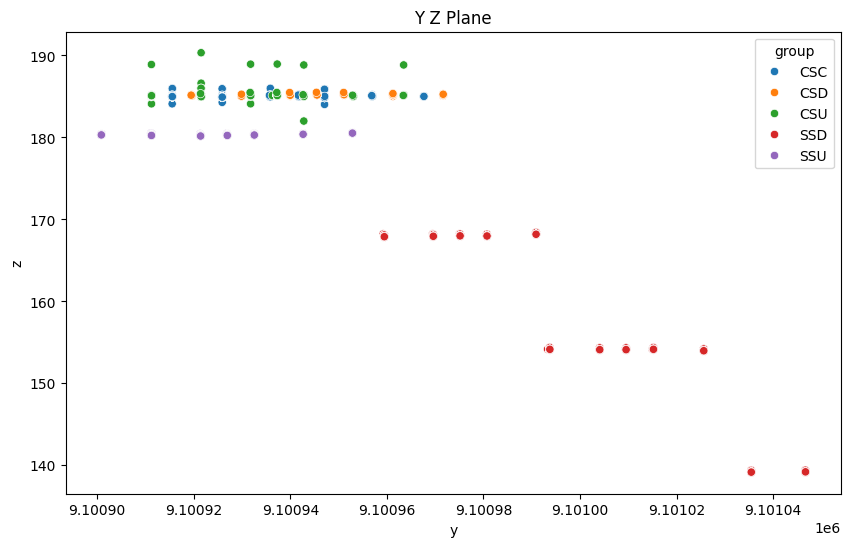

In [ ]:
df = df.drop(df[df['z'] > 200].index)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='y', y='z', data=df,hue='group',legend=True)
plt.title("Y Z Plane")

Text(0.5, 1.0, 'X Z Plane')

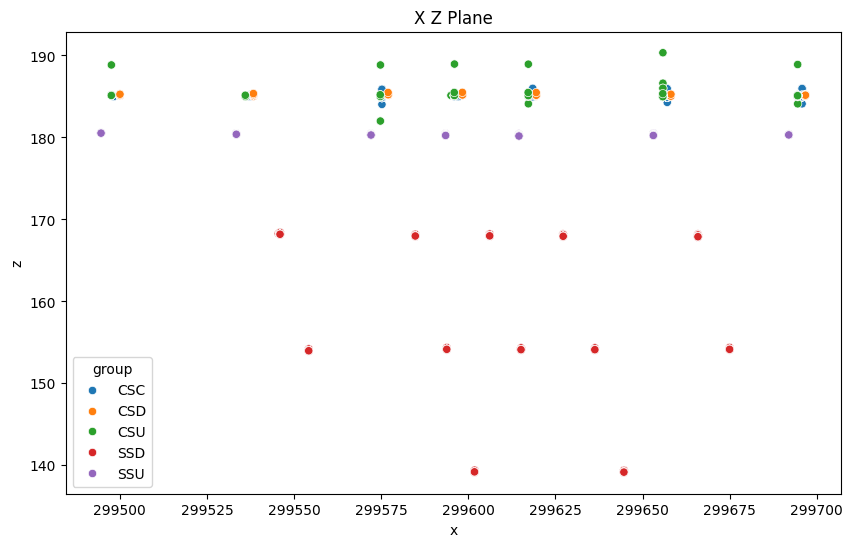

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='z', data=df,hue='group',legend=True)
plt.title("X Z Plane")

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='x', y='y', z='z',
                    color='group', symbol='group',
                    title="3D Dam Surface Instrutmen Visualization",
                    hover_data=['surface_monument'])

fig.show()

In [ ]:
df.describe()

,time_stamp,x,y,z
count,3804,3804.000000,3.804000e+03,3804.000000
mean,2023-10-03 00:51:28.958990592,299599.410751,9.100950e+06,178.347323
min,2023-01-31 00:00:00,299494.620000,9.100901e+06,139.101000
25%,2023-04-06 00:00:00,299554.217750,9.100927e+06,180.270000
50%,2023-09-09 00:00:00,299597.166000,9.100943e+06,184.971500
75%,2024-03-24 00:00:00,299653.116250,9.100963e+06,185.092000
max,2024-09-01 00:00:00,299696.765000,9.101047e+06,190.338000
std,NaN,58.930584,3.247036e+01,11.765530


# Data Preprocessing

## Data Cleaning

In [ ]:
df_process = df.copy()
df_process['x_deform'] = df_process.groupby('surface_monument')['x'].diff().fillna(0)
df_process['y_deform'] = df_process.groupby('surface_monument')['y'].diff().fillna(0)
df_process['z_deform'] = df_process.groupby('surface_monument')['z'].diff().fillna(0)
df_process.describe()

,time_stamp,x,y,z,x_deform,y_deform,z_deform
count,3804,3804.000000,3.804000e+03,3804.000000,3804.000000,3804.000000,3804.000000
mean,2023-10-03 00:51:28.958990592,299599.410751,9.100950e+06,178.347323,0.000128,0.000006,-0.000297
min,2023-01-31 00:00:00,299494.620000,9.100901e+06,139.101000,-1.271000,-1.000000,-5.327000
25%,2023-04-06 00:00:00,299554.217750,9.100927e+06,180.270000,-0.003000,-0.008000,-0.003000
50%,2023-09-09 00:00:00,299597.166000,9.100943e+06,184.971500,0.000000,0.000000,0.000000
75%,2024-03-24 00:00:00,299653.116250,9.100963e+06,185.092000,0.003000,0.008000,0.001000
max,2024-09-01 00:00:00,299696.765000,9.101047e+06,190.338000,1.274000,0.991000,5.328000
std,NaN,58.930584,3.247036e+01,11.765530,0.062208,0.031644,0.263205


In [ ]:
#  add new column in df_process, for each time_stamp interp in rwl (date) to return rwl

import numpy as np
def find_nearest_rwl(timestamp):
  """Finds the nearest reservoir water level for a given timestamp."""
  try:
    nearest_row = rwl.iloc[(rwl['date'] - timestamp).abs().argmin()]
    return nearest_row['RWL']
  except:
    return np.nan  # Or handle the case where no nearest date is found

# Apply the function to create a new column
df_process['rwl'] = df_process['time_stamp'].apply(find_nearest_rwl)

df_process['rwl_deform'] = df_process.groupby('surface_monument')['rwl'].diff().fillna(0)
df_process

,time_stamp,x,y,z,surface_monument,group,x_deform,y_deform,z_deform,rwl,rwl_deform
0,2023-01-31,299498.292,9100967.580,185.040,CSC 1,CSC,0.000,0.000,0.000,169.25,0.00
5,2023-02-05,299498.297,9100967.679,185.025,CSC 1,CSC,0.005,0.099,-0.015,179.50,10.25
6,2023-02-06,299498.295,9100967.667,185.023,CSC 1,CSC,-0.002,-0.012,-0.002,179.50,0.00
7,2023-02-07,299498.293,9100967.665,185.022,CSC 1,CSC,-0.002,-0.002,-0.001,179.50,0.00
8,2023-02-08,299498.300,9100967.667,185.022,CSC 1,CSC,0.007,0.002,0.000,179.15,-0.35
...,...,...,...,...,...,...,...,...,...,...,...
4513,2024-08-04,299691.943,9100900.844,180.332,SSU 7,SSU,0.008,0.029,0.016,161.29,-0.09
4514,2024-08-11,299691.937,9100900.822,180.310,SSU 7,SSU,-0.006,-0.022,-0.022,161.26,-0.03
4515,2024-08-18,299691.937,9100900.822,180.310,SSU 7,SSU,0.000,0.000,0.000,161.24,-0.02
4516,2024-08-25,299691.953,9100900.889,180.324,SSU 7,SSU,0.016,0.067,0.014,161.16,-0.08


In [ ]:
# squared sum of deform, but group of each unique surface monument

absolute_distance = df_process.groupby('surface_monument')['x_deform'].apply(lambda x: (x**2).sum())
growth_distance = df_process.groupby('surface_monument')['y_deform'].apply(lambda x: (x**2).sum())
increase_distance = df_process.groupby('surface_monument')['z_deform'].apply(lambda x: (x**2).sum())
rwl_flucs = df_process.groupby('surface_monument')['rwl_deform'].apply(lambda x: (x**2).mean())

distance_combined = pd.concat([absolute_distance, growth_distance, increase_distance,rwl_flucs], axis=1)
distance_combined

,x_deform,y_deform,z_deform,rwl_deform
surface_monument,,,,
CSC 1,0.003756,0.022003,0.001424,4.044180
CSC 2,0.010397,0.039903,0.052334,3.754707
CSC 3,0.008137,0.046637,9.588683,3.754231
CSC 4,2.599063,0.071835,0.354882,3.723458
CSC 5,3.163378,0.106621,4.459852,3.723458
CSC 6,3.170532,0.078979,4.862372,4.077603
CSC 7,3.256723,0.095982,11.236505,3.754231
CSD 1,0.005122,0.011017,0.065550,5.104680
CSD 2,0.001407,0.020435,0.120637,5.104680


## Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(distance_combined)


# Model : KMeans & Hierarchical Clustering

## K-Means

Text(0, 0.5, 'SSE')

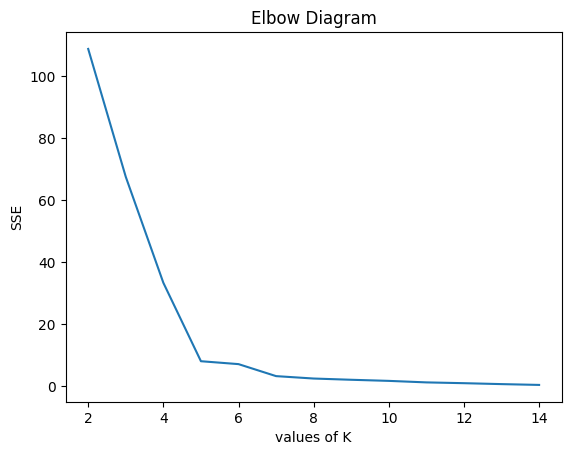

In [ ]:
from sklearn.cluster import KMeans

sse = []
for i in range (2,15): # range untuk values of k (jumlah cluster)
  k_means = KMeans(n_clusters=i, random_state=42)
  k_means.fit(features)
  sse.append(k_means.inertia_)

sns.lineplot(x=range(2,15), y=sse)
plt.title("Elbow Diagram")
plt.xlabel("values of K")
plt.ylabel("SSE")

Text(0, 0.5, 'SS')

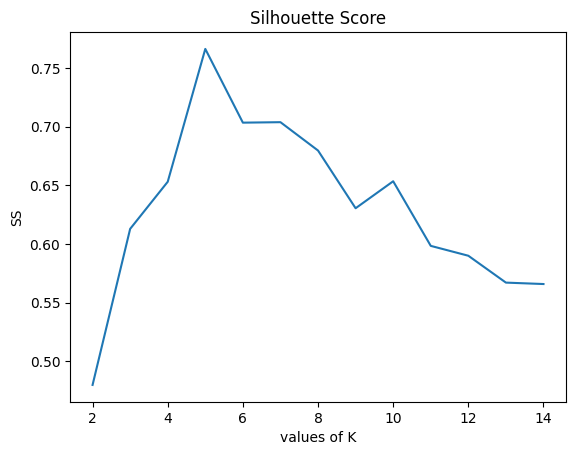

In [ ]:
from sklearn.metrics import silhouette_score

ss = []
for i in range (2,15):
  k_means = KMeans(n_clusters=i, random_state=42)
  k_means.fit(features)
  ss.append(silhouette_score(features, k_means.labels_))

sns.lineplot(x=range(2,15), y=ss)
plt.title("Silhouette Score")
plt.xlabel("values of K")
plt.ylabel("SS")

I will try with 7.

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
distance_combined["cluster"] = kmeans.fit_predict(features)
results = distance_combined.reset_index()

cluster_results = results.groupby('cluster')['surface_monument'].unique()

# Print the results
for cluster, monuments in cluster_results.items():
  print(f"Cluster {cluster}: {monuments}")

Cluster 0: ['CSU 1' 'CSU 5' 'CSU 7']
Cluster 1: ['SSD 1' 'SSD 10' 'SSD 11' 'SSD 12' 'SSD 2' 'SSD 3' 'SSD 4' 'SSD 5'
 'SSD 6' 'SSD 7' 'SSD 8' 'SSD 9']
Cluster 2: ['CSC 4' 'CSC 5' 'CSC 6' 'CSC 7']
Cluster 3: ['CSU 4']
Cluster 4: ['CSC 1' 'CSC 2' 'CSC 3' 'CSU 2' 'SSU 1' 'SSU 2' 'SSU 3' 'SSU 4' 'SSU 5'
 'SSU 6' 'SSU 7']
Cluster 5: ['CSD 1' 'CSD 2' 'CSD 3' 'CSD 4' 'CSD 5' 'CSD 6' 'CSD 7']
Cluster 6: ['CSU 3' 'CSU 6']


## Hierachical Clustering

In [ ]:
hie = pd.DataFrame(features)
hie.columns = ['x_deform', 'y_deform', 'z_deform','rwl_deform']
hie['surface_monument'] = distance_combined.index
hie.set_index('surface_monument', inplace=True)
hie

,x_deform,y_deform,z_deform,rwl_deform
surface_monument,,,,
CSC 1,-0.383572,-0.235148,-0.456274,-0.495882
CSC 2,-0.376578,-0.177648,-0.452747,-0.989716
CSC 3,-0.378958,-0.156016,0.208017,-0.990528
CSC 4,2.349981,-0.075073,-0.431783,-1.043025
CSC 5,2.944356,0.036670,-0.147354,-1.043025
CSC 6,2.951891,-0.052124,-0.119464,-0.438863
CSC 7,3.042674,0.002494,0.322193,-0.990528
CSD 1,-0.382134,-0.270438,-0.451831,1.313301
CSD 2,-0.386047,-0.240184,-0.448014,1.313301


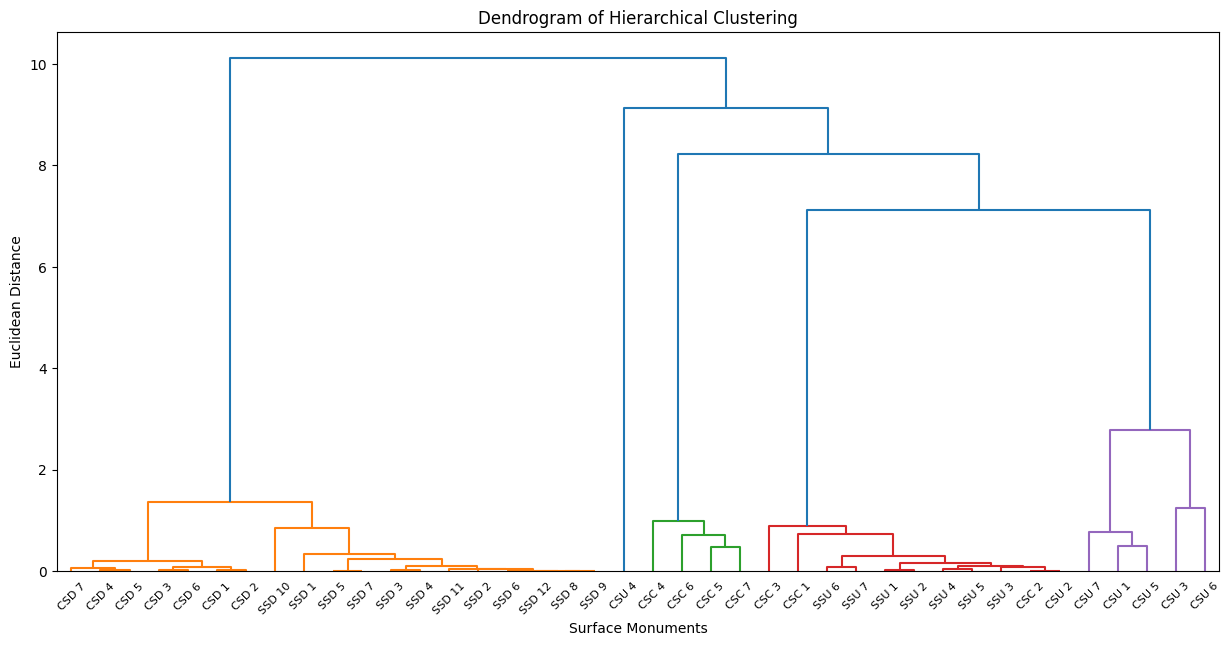

In [ ]:
# create dendrogram of hie dataset

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Assuming 'hie' DataFrame is already defined as shown in your code.

# Calculate the linkage matrix
linkage_matrix = sch.linkage(hie, method='ward')

# Create the dendrogram
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(linkage_matrix, labels=hie.index)
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Surface Monuments')
plt.ylabel('Euclidean Distance')
plt.show()


# Visualization of Clustering

In [ ]:
cluster_results

,surface_monument
cluster,
0,"[CSU 1, CSU 5, CSU 7]"
1,"[SSD 1, SSD 10, SSD 11, SSD 12, SSD 2, SSD 3, ..."
2,"[CSC 4, CSC 5, CSC 6, CSC 7]"
3,[CSU 4]
4,"[CSC 1, CSC 2, CSC 3, CSU 2, SSU 1, SSU 2, SSU..."
5,"[CSD 1, CSD 2, CSD 3, CSD 4, CSD 5, CSD 6, CSD 7]"
6,"[CSU 3, CSU 6]"


In [ ]:
distance_combined['x'] = df_process.groupby('surface_monument')['x'].min()
distance_combined['y'] = df_process.groupby('surface_monument')['y'].min()
distance_combined['z'] = df_process.groupby('surface_monument')['z'].min()
distance_combined = distance_combined.reset_index()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(distance_combined, x='x', y='y', z='z',
                    color='cluster', symbol='cluster',
                    color_continuous_scale='plasma',
                    opacity=0.7,
                    title="3D Dam Surface Instrument Visualization"
                    )

fig.update_layout(
    scene=dict(
        camera=dict(
            eye=dict(x=2, y=2, z=5)  # Sesuaikan angka agar lebih jauh
        )
    )
)

fig.add_trace(go.Mesh3d(
    x=distance_combined['x'],
    y=distance_combined['y'],
    z=distance_combined['z'],
    intensity=distance_combined['cluster'],
    colorscale='magma',  # Warna permukaan
    opacity=0.5
))

fig.add_trace(go.Scatter3d(
    x=distance_combined['x'],
    y=distance_combined['y'],
    z=distance_combined['z'],
    mode='text',
    text=distance_combined['surface_monument'],  # Nama titik
    textposition='top center',
    textfont=dict(
        size=12,
        color='black'
    )
))

fig.update_layout(
    scene=dict(
        aspectmode="manual",
        aspectratio=dict(
            x=max(distance_combined['x']) - np.mean(distance_combined['x']),
            y=max(distance_combined['y']) - np.mean(distance_combined['y']),
            z=max(distance_combined['z']) - min(distance_combined['z'])
        )
    )
)

fig.update_layout(
    width=1700,  # Lebar window dalam piksel
    height=800   # Tinggi window dalam piksel
)

fig.show()

# Only SSD Surface Monument

In [ ]:
# prompt: ssd if group is 'SSD'

df_ssd = df_process[df_process['group'] == 'SSD']


In [ ]:
ssd = distance_combined.reset_index(drop=True)
ssd['group'] = ssd["surface_monument"].str[:3]
ssd = ssd[ssd['group'] == 'SSD']
ssd

,surface_monument,x_deform,y_deform,z_deform,rwl_deform,cluster,x,y,z,group
21,SSD 1,0.249234,0.013429,0.196793,4.83556,1,299545.487,9100990.867,168.127,SSD
22,SSD 10,0.005089,0.211677,0.207400,4.83556,1,299674.952,9100993.278,154.080,SSD
23,SSD 11,0.034601,0.004391,0.205960,4.83556,1,299601.716,9101046.654,139.111,SSD
24,SSD 12,0.006857,0.006185,0.200409,4.83556,1,299644.624,9101035.418,139.101,SSD
25,SSD 2,0.008849,0.012807,0.220367,4.83556,1,299584.713,9100980.626,167.904,SSD
26,SSD 3,0.010350,0.020568,0.241906,4.83556,1,299606.053,9100975.017,167.927,SSD
27,SSD 4,0.012877,0.026054,0.270306,4.83556,1,299627.150,9100969.458,167.872,SSD
28,SSD 5,0.008548,0.050234,0.304285,4.83556,1,299665.871,9100959.230,167.823,SSD
29,SSD 6,0.002871,0.002644,0.193856,4.83556,1,299554.209,9101025.597,153.914,SSD
30,SSD 7,0.005317,0.051477,0.182249,4.83556,1,299593.811,9101014.971,154.084,SSD


In [ ]:
from sklearn.cluster import KMeans

ssd_c = ssd[['x_deform','y_deform','z_deform']]
name_ssd = ssd[['surface_monument','x','y','z']].reset_index(drop=True)
scaler = StandardScaler()
ssd_c = scaler.fit_transform(ssd_c)
ssd_c = pd.DataFrame(ssd_c)

ssd_c

,0,1,2
0,3.291662,-0.369168,-0.572705
1,-0.362327,3.172901,-0.273665
2,0.079363,-0.530649,-0.314262
3,-0.335866,-0.498596,-0.470760
4,-0.306053,-0.380281,0.091911
5,-0.283588,-0.241617,0.699155
6,-0.245768,-0.143599,1.499829
7,-0.310558,0.288422,2.457791
8,-0.395523,-0.561862,-0.655507
9,-0.358915,0.310630,-0.982741


Text(0, 0.5, 'SSE')

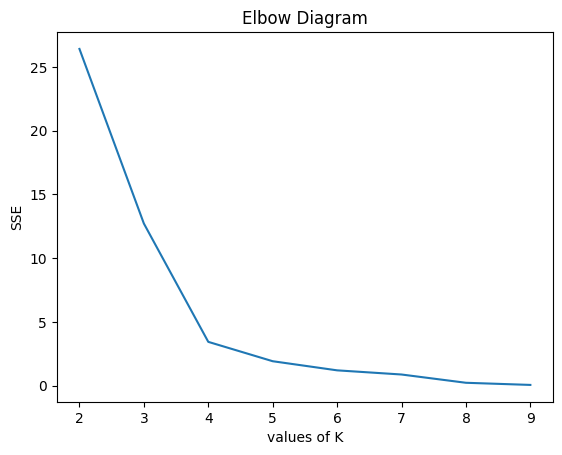

In [ ]:
sse = []
for i in range (2,10): # range untuk values of k (jumlah cluster)
  k_means = KMeans(n_clusters=i, random_state=42)
  k_means.fit(ssd_c)
  sse.append(k_means.inertia_)

sns.lineplot(x=range(2,10), y=sse)
plt.title("Elbow Diagram")
plt.xlabel("values of K")
plt.ylabel("SSE")

Text(0, 0.5, 'SS')

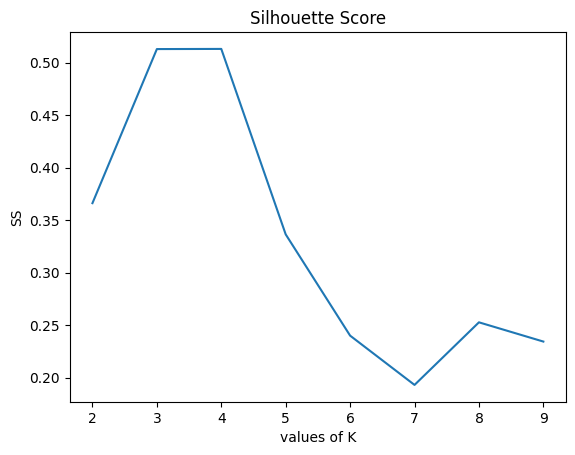

In [ ]:
from sklearn.metrics import silhouette_score

ss = []
for i in range (2,10):
  k_means = KMeans(n_clusters=i, random_state=42)
  k_means.fit(ssd_c)
  ss.append(silhouette_score(ssd_c, k_means.labels_))

sns.lineplot(x=range(2,10), y=ss)
plt.title("Silhouette Score")
plt.xlabel("values of K")
plt.ylabel("SS")

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
ssd_c["Cluster SSD"] = kmeans.fit_predict(ssd_c)
results_ssd = ssd_c.reset_index(drop=True)



# Print the results
#for cluster, monuments in cluster_results.items():
#  print(f"Cluster {cluster}: {monuments}")

In [ ]:
combined_ssd = pd.concat([name_ssd, results_ssd], axis=1)
combined_ssd

,surface_monument,x,y,z,0,1,2,Cluster SSD
0,SSD 1,299545.487,9100990.867,168.127,3.291662,-0.369168,-0.572705,2
1,SSD 10,299674.952,9100993.278,154.080,-0.362327,3.172901,-0.273665,1
2,SSD 11,299601.716,9101046.654,139.111,0.079363,-0.530649,-0.314262,0
3,SSD 12,299644.624,9101035.418,139.101,-0.335866,-0.498596,-0.470760,0
4,SSD 2,299584.713,9100980.626,167.904,-0.306053,-0.380281,0.091911,0
5,SSD 3,299606.053,9100975.017,167.927,-0.283588,-0.241617,0.699155,0
6,SSD 4,299627.150,9100969.458,167.872,-0.245768,-0.143599,1.499829,3
7,SSD 5,299665.871,9100959.230,167.823,-0.310558,0.288422,2.457791,3
8,SSD 6,299554.209,9101025.597,153.914,-0.395523,-0.561862,-0.655507,0
9,SSD 7,299593.811,9101014.971,154.084,-0.358915,0.310630,-0.982741,0


<Axes: xlabel='x', ylabel='z'>

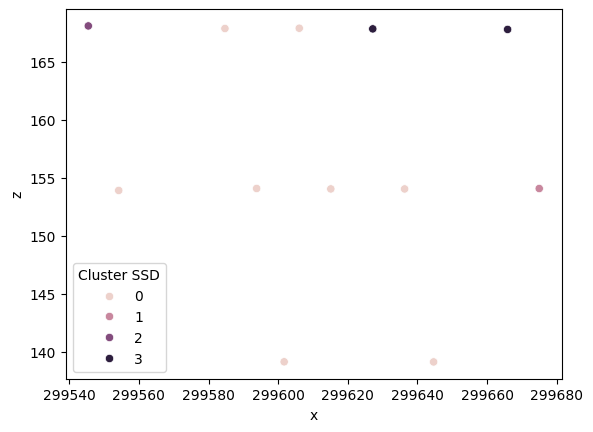

In [ ]:
sns.scatterplot(x='x', y='z', data=combined_ssd,hue='Cluster SSD',legend=True,color='magma')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(combined_ssd, x='x', y='y', z='z',
                    color='Cluster SSD', symbol='Cluster SSD',
                    color_continuous_scale='plasma',
                    opacity=0.7,
                    title="3D Dam Surface Instrument Visualization"
                    )

fig.update_layout(
    scene=dict(
        camera=dict(
            eye=dict(x=2, y=2, z=5)  # Sesuaikan angka agar lebih jauh
        )
    )
)

fig.add_trace(go.Mesh3d(
    x=combined_ssd['x'],
    y=combined_ssd['y'],
    z=combined_ssd['z'],
    intensity=combined_ssd['Cluster SSD'],
    colorscale='viridis',  # Warna permukaan
    opacity=0.8
  )
)

fig.add_trace(go.Scatter3d(
    x=combined_ssd['x'],
    y=combined_ssd['y'],
    z=combined_ssd['z'],
    mode='text',
    text=combined_ssd['surface_monument'],  # Nama titik
    textposition='top center',
    textfont=dict(
        size=12,
        color='black'
    )
))

fig.update_layout(
    scene=dict(
        aspectmode="manual",
        aspectratio=dict(
            x=max(combined_ssd['x']) - np.mean(combined_ssd['x']),
            y=max(combined_ssd['y']) - np.mean(combined_ssd['y']),
            z=max(combined_ssd['z']) - min(combined_ssd['z'])
        )
    )
)

fig.update_layout(
    width=1700,  # Lebar window dalam piksel
    height=800   # Tinggi window dalam piksel
)

fig.show()

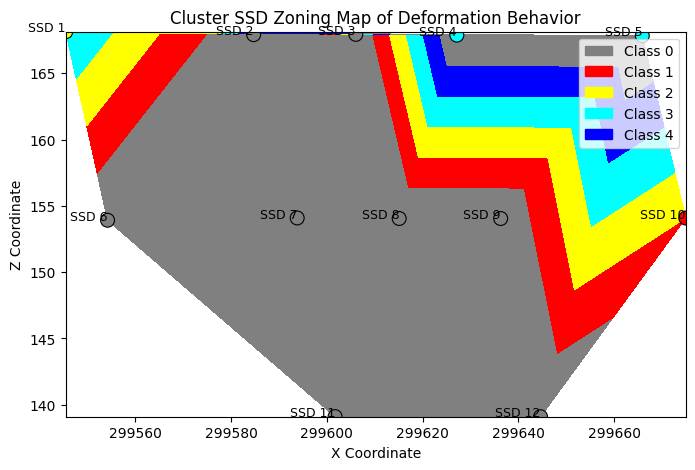

In [ ]:
colors = {0: 'gray', 1: 'red', 2: 'yellow', 3: 'cyan', 4: 'blue'}

plt.figure(figsize=(8, 5))

# Buat contour plot untuk menggambarkan zona
plt.tricontourf(combined_ssd['x'], combined_ssd['z'], combined_ssd['Cluster SSD'], levels=len(colors), colors=[colors[c] for c in sorted(colors)])

# Scatter plot untuk titik-titik data
sns.scatterplot(x='x', y='z', hue='Cluster SSD', palette=colors, data=combined_ssd, edgecolor='black', s=100)

# Tambahkan label untuk setiap titik
for i, row in combined_ssd.iterrows():
    plt.text(row['x'], row['z'], row['surface_monument'], fontsize=9, ha='right')

# Tambahkan legenda
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=colors[k], label=f'Class {k}') for k in colors]
plt.legend(handles=legend_patches, loc='upper right')

plt.xlabel("X Coordinate")
plt.ylabel("Z Coordinate")
plt.title("Cluster SSD Zoning Map of Deformation Behavior")

plt.show()

<a href="https://www.linkedin.com/in/iqbalfauzanh/"><img src="https://img.shields.io/badge/-© 2025 Iqbal Fauzan Herlambang-417DAC?style=for-the-badge&logoColor=white"/></a>